In [ ]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib import pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:

# Charger le fichier de base
data = pd.read_csv('/content/trainingSelective.csv')

# Afficher les premières lignes pour vérifier le contenu
print("Aperçu du fichier de base :")
print(data.head(n=10000))

Aperçu du fichier de base :
      Header_Length  Protocol Type  Duration          Rate         Srate  \
0          50667.49            6.0      64.0     84.034295     84.034295   
1             54.00            6.0      64.0      0.000000      0.000000   
2             54.00            6.0      64.0     70.020601     70.020601   
3              0.00            1.0      64.0     25.514240     25.514240   
4             54.00            6.0      64.0      3.997118      3.997118   
...             ...            ...       ...           ...           ...   
9995           0.00            1.0      64.0      4.003258      4.003258   
9996          54.00            6.0      64.0     31.848620     31.848620   
9997       22381.00           17.0      64.0  28796.788878  28796.788878   
9998          70.20            6.0      64.0      0.600131      0.600131   
9999       23138.00           17.0      64.0  17575.157847  17575.157847   

      Drate  fin_flag_number  syn_flag_number  rst_flag_num

In [ ]:

# Afficher les premières lignes du dataset
print("Aperçu des premières lignes du dataset :")
print(data.head())

# Informations générales sur le dataset
print("\nInformations générales sur le dataset :")
print(data.info())

# Description statistique des colonnes numériques
print("\nStatistiques descriptives des colonnes numériques :")
print(data.describe())

# Vérifier le nombre de valeurs manquantes
print("\nNombre de valeurs manquantes dans chaque colonne :")
print(data.isnull().sum())

# Distribution des classes dans la colonne 'label' (si présente)
if 'label' in data.columns:
    print("\nDistribution des classes dans la colonne 'label' :")
    print(data['label'].value_counts())

# Afficher les types de données
print("\nTypes de données dans chaque colonne :")
print(data.dtypes)

# Taille du dataset
print("\nDimensions du dataset :")
print(f"Nombre de lignes : {data.shape[0]}, Nombre de colonnes : {data.shape[1]}")
+

Aperçu des premières lignes du dataset :
   Header_Length  Protocol Type  Duration       Rate      Srate  Drate  \
0       50667.49            6.0      64.0  84.034295  84.034295    0.0   
1          54.00            6.0      64.0   0.000000   0.000000    0.0   
2          54.00            6.0      64.0  70.020601  70.020601    0.0   
3           0.00            1.0      64.0  25.514240  25.514240    0.0   
4          54.00            6.0      64.0   3.997118   3.997118    0.0   

   fin_flag_number  syn_flag_number  rst_flag_number  psh_flag_number  ...  \
0              0.0              0.0              0.0             0.62  ...   
1              0.0              0.0              0.0             0.00  ...   
2              0.0              1.0              0.0             0.00  ...   
3              0.0              0.0              0.0             0.00  ...   
4              0.0              0.0              0.0             0.00  ...   

         Std  Tot size           IAT  Number 

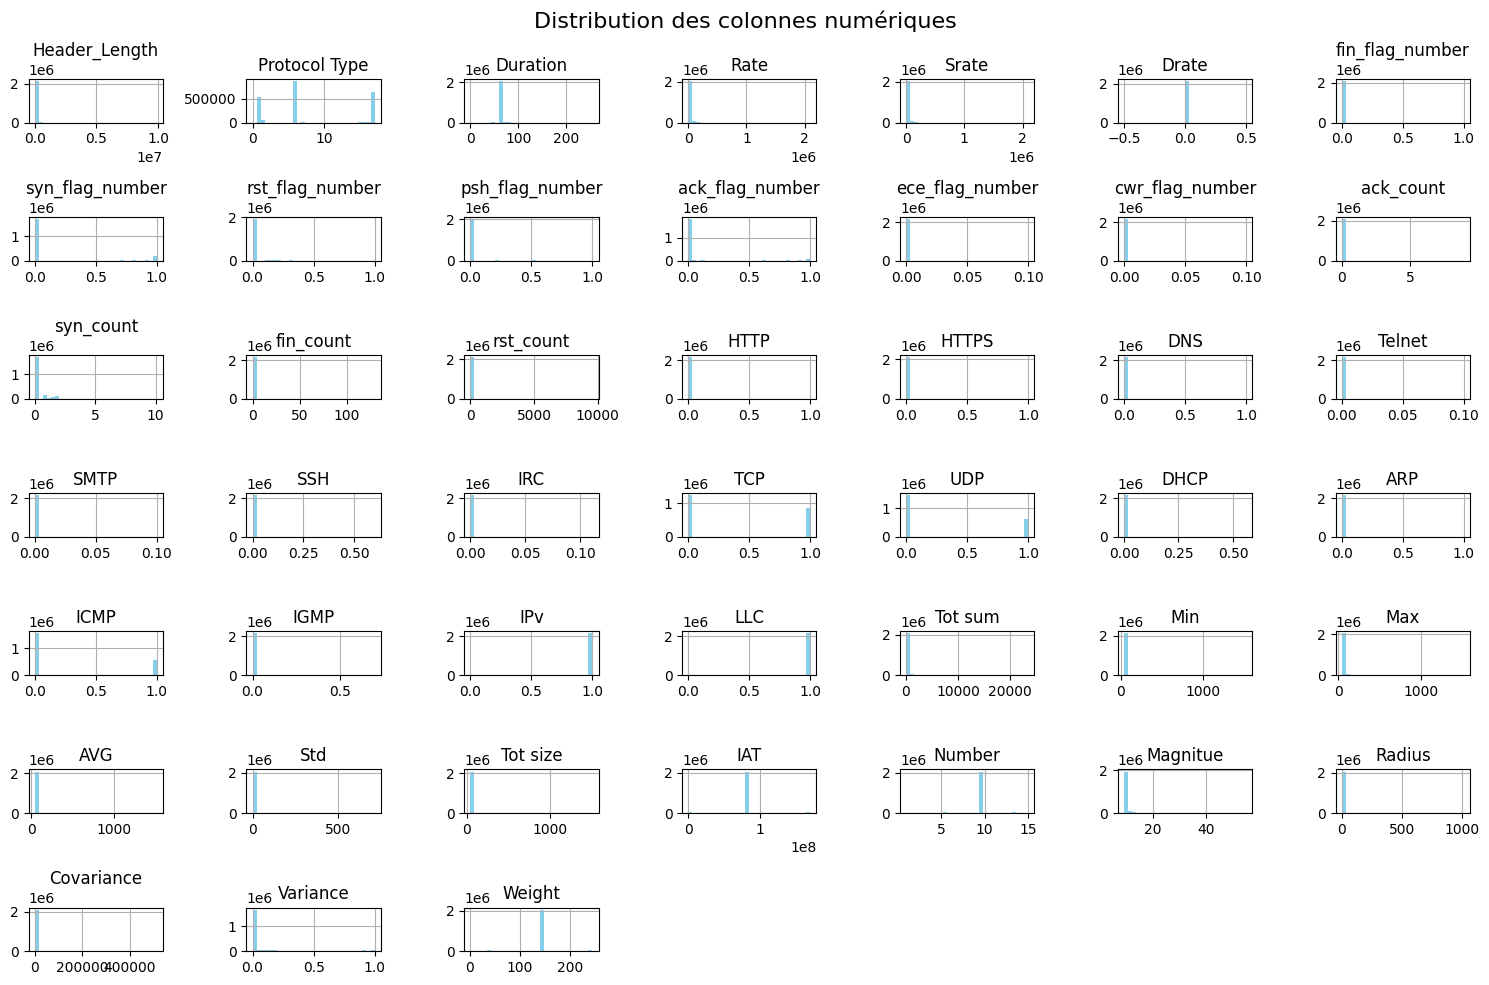


Nombre de valeurs manquantes dans chaque colonne :
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IGMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
lab

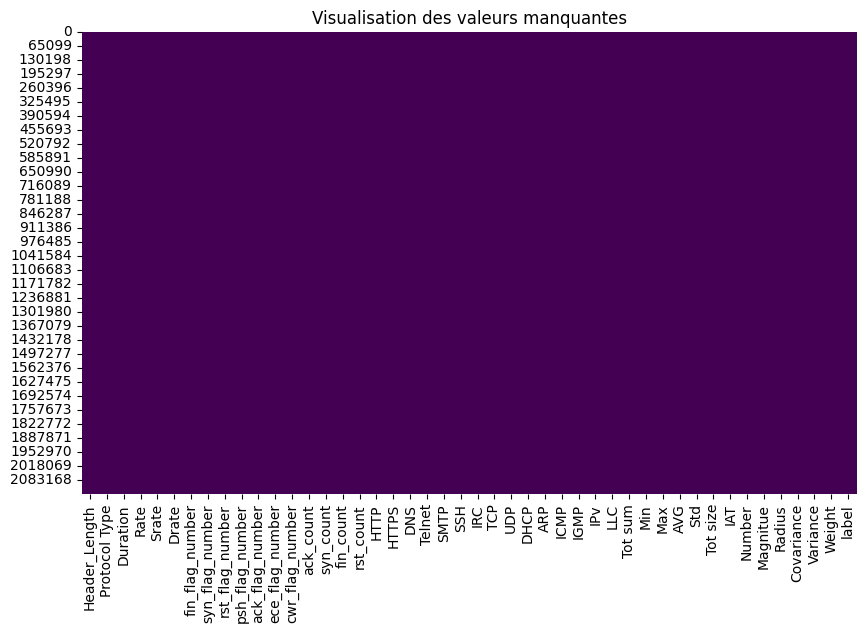

<ipython-input-6-466529068533>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='Set2')


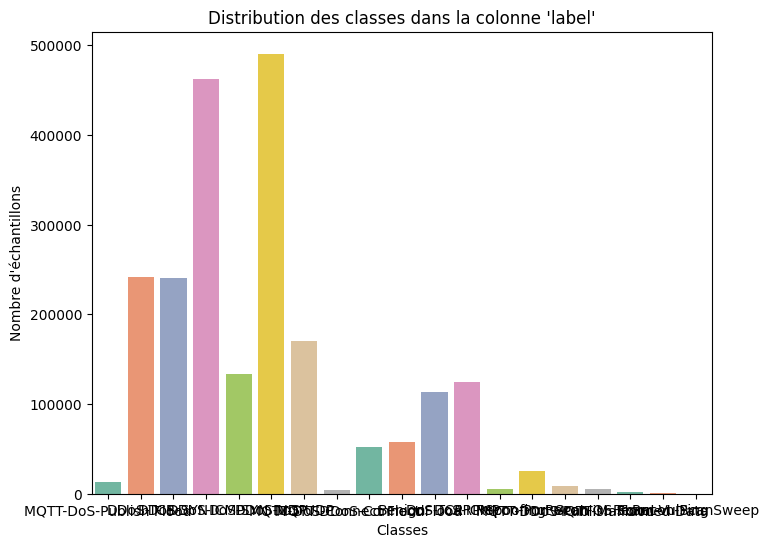

ValueError: could not convert string to float: 'MQTT-DoS-Publish Flood'

<Figure size 1200x800 with 0 Axes>

In [ ]:

# Générer un histogramme pour chaque colonne numérique
data.hist(figsize=(15, 10), bins=30, color='skyblue')
plt.suptitle("Distribution des colonnes numériques", fontsize=16)
plt.tight_layout()
plt.show()

# **2. Visualisation des valeurs manquantes**
print("\nNombre de valeurs manquantes dans chaque colonne :")
print(data.isnull().sum())

# Afficher les valeurs manquantes sous forme de heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Visualisation des valeurs manquantes")
plt.show()

# **3. Distribution des classes (si une colonne 'label' existe)**
if 'label' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='label', data=data, palette='Set2')
    plt.title("Distribution des classes dans la colonne 'label'")
    plt.xlabel("Classes")
    plt.ylabel("Nombre d'échantillons")
    plt.show()

# **4. Matrice de corrélation entre les colonnes numériques**
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation des colonnes numériques")
plt.show()

# **5. Types des colonnes**
print("\nTypes de données dans chaque colonne :")
print(data.dtypes)

# **6. Dimensions du dataset**
print("\nDimensions du dataset :")
print(f"Nombre de lignes : {data.shape[0]}, Nombre de colonnes : {data.shape[1]}")


In [ ]:

from sklearn.model_selection import learning_curve# Remplacement de tout ce qui n'est pas 'Benign' par 'Attack'
data['label'] = data['label'].apply(lambda x: 'Attack' if x != 'Benign' else x)

# Afficher un aperçu après transformation
print("\nDistribution des labels après transformation :")
print(data['label'].value_counts())



Distribution des labels après transformation :
label
Attack    2090829
Benign      57420
Name: count, dtype: int64


In [ ]:
# Séparer le dataset en 'Benign' et 'Attack'
benign_data = data[data['label'] == 'Benign']
attack_data = data[data['label'] == 'Attack']

# Sélectionner un échantillon des données Attack
attack_sample = attack_data.sample(n=len(benign_data), random_state=42)

# Combiner les deux échantillons
sampled_data = pd.concat([benign_data, attack_sample])

# Mélanger les données
sampled_data = sampled_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Afficher les nouvelles dimensions et la distribution des labels
print("\nTaille de l'échantillon équilibré :")
print(sampled_data.shape)
print(sampled_data['label'].value_counts())



Taille de l'échantillon équilibré :
(114840, 46)
label
Benign    57420
Attack    57420
Name: count, dtype: int64


In [ ]:
# Encodage des labels en valeurs numériques (Benign=0, Attack=1)
label_encoder = LabelEncoder()
sampled_data['label'] = label_encoder.fit_transform(sampled_data['label'])

# Séparation des features (X) et de la cible (y)
X = sampled_data.drop(columns=['label'])
y = sampled_data['label']

# Division en train/test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vérification des tailles
print("\nTaille des ensembles d'entraînement et de test :")
print(f"Train : {X_train.shape}, Test : {X_test.shape}")



Taille des ensembles d'entraînement et de test :
Train : (80388, 45), Test : (34452, 45)


In [ ]:
# Initialisation et entraînement du modèle XGBoost
model = xgb.XGBClassifier(
    n_estimators=100,      # Nombre d'arbres
    learning_rate=0.1,     # Taux d'apprentissage
    max_depth=6,           # Profondeur maximale des arbres
    random_state=42
)

print("\nEntraînement du modèle XGBoost en cours...")
model.fit(X_train, y_train)
print("Entraînement terminé !")


Entraînement du modèle XGBoost en cours...
Entraînement terminé !


In [ ]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation des performances
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrécision du modèle : {accuracy:.4f}")

print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred))

print("\nRapport de classification :")
print(classification_report(y_test, y_pred))


Précision du modèle : 0.9989

Matrice de confusion :
[[17284    31]
 [    6 17131]]

Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17315
           1       1.00      1.00      1.00     17137

    accuracy                           1.00     34452
   macro avg       1.00      1.00      1.00     34452
weighted avg       1.00      1.00      1.00     34452



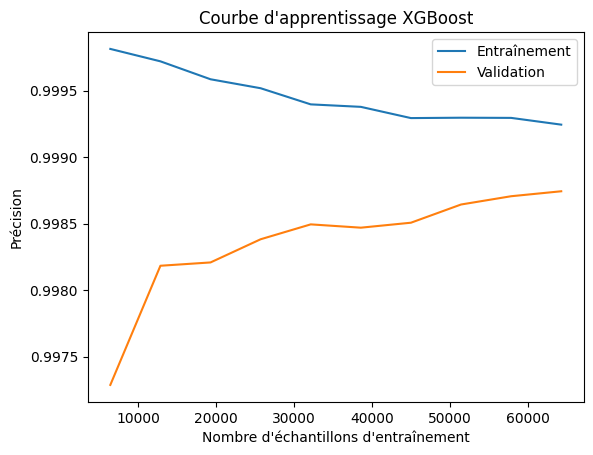

In [ ]:

# Fonction pour tracer la courbe d'apprentissage
def plot_learning_curve(model, X, y, title="Courbe d'apprentissage"):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', n_jobs=-1
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, label="Entraînement")
    plt.plot(train_sizes, test_mean, label="Validation")
    plt.title(title)
    plt.xlabel("Nombre d'échantillons d'entraînement")
    plt.ylabel("Précision")
    plt.legend()
    plt.show()

# Appel de la fonction
plot_learning_curve(model, X_train, y_train, title="Courbe d'apprentissage XGBoost")



Ce graphique représente la courbe d'apprentissage du modèle XGBoost et a été tracé pour vérifier s'il y a un sur-apprentissage.

    La courbe bleue montre la précision sur l'ensemble d'entraînement, tandis que la courbe orange représente la précision sur l'ensemble de validation.
    On observe que la précision de l'entraînement reste légèrement plus élevée que celle de la validation, ce qui est normal. Cependant, l'écart reste faible, ce qui indique que le modèle ne présente pas de sur-apprentissage significatif.
    La précision augmente avec le nombre d'échantillons d'entraînement, montrant que le modèle généralise bien sur les nouvelles données.

Cela confirme que le modèle XGBoost est bien entraîné et stable sur ce jeu de données.

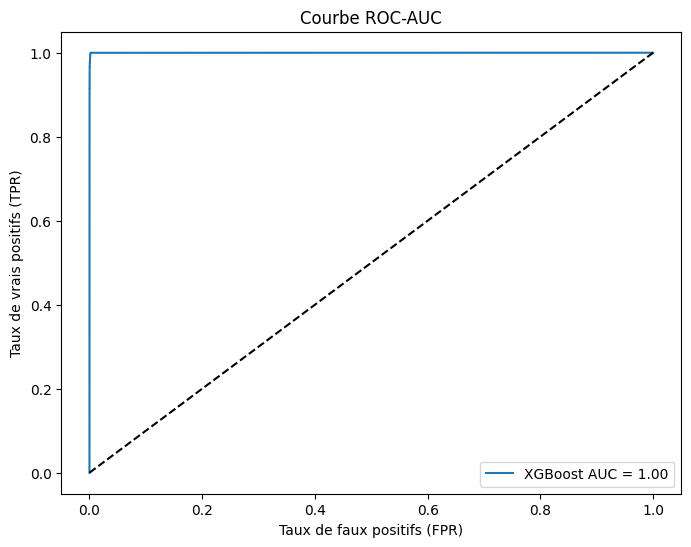

In [ ]:
# Prédictions des probabilités pour la classe positive
y_proba = model.predict_proba(X_test)[:, 1]

# Calcul de la courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonale pour comparaison
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC-AUC")
plt.legend()
plt.show()

Ce graphique représente la courbe ROC-AUC du modèle XGBoost. La courbe ROC évalue la capacité du modèle à discriminer les classes positives et négatives.

    L'AUC (Area Under the Curve) est égale à 1.00, ce qui indique que le modèle a une performance parfaite pour séparer les classes "Attack" et "Benign".
    La courbe suit parfaitement le coin supérieur gauche, montrant un taux de vrais positifs (TPR) élevé avec un taux de faux positifs (FPR) nul.

Ces résultats confirment que le modèle XGBoost est extrêmement performant sur ce jeu de données. Toutefois, une AUC parfaite peut également suggérer un risque de sur-apprentissage si les données sont trop simples ou déséquilibrées.

Le modèle est entrainé et nous pouvons observer les différents shémas correspondant à l'interprêtation de cet entrainement en question. Passons maintenant à l'attaque.
Je vais utiliser ici deux techniques d'attaques différentes avec pour chacune de ses attaques une défenses permettant de les contrer. IL s'agit en effet de L'attaque par perturbation (Fast Gradient Sign Methode- FGSM) et l'attaque par bruit aléatoire.

In [ ]:
# Fonction FGSM pour générer des exemples adversariaux
def fgsm_attack(model, X, y, epsilon=0.1):
    X_adv = X.copy()
    for i in range(X.shape[0]):
        X_sample = X.iloc[i:i+1]  # Échantillon unique
        y_sample = y.iloc[i]
        pred_proba = model.predict_proba(X_sample)[0, 1]  # Probabilité de la classe positive
        gradient = np.sign(pred_proba - y_sample)  # Direction de la perturbation
        X_adv.iloc[i] += epsilon * gradient  # Ajout de la perturbation
    return X_adv

# Sélectionner un sous-échantillon pour l'attaque
X_test_sample = X_test.sample(n=500, random_state=42)  # 500 échantillons pour aller plus vite
y_test_sample = y_test.loc[X_test_sample.index]

# Appliquer FGSM
epsilon = 1000
X_test_adv = fgsm_attack(model, X_test_sample, y_test_sample, epsilon)

# Prédictions après l'attaque
y_pred_adv = model.predict(X_test_adv)
accuracy_adv = accuracy_score(y_test_sample, y_pred_adv)
print(f"Précision après attaque FGSM : {accuracy_adv:.4f}")


Précision après attaque FGSM : 0.7560


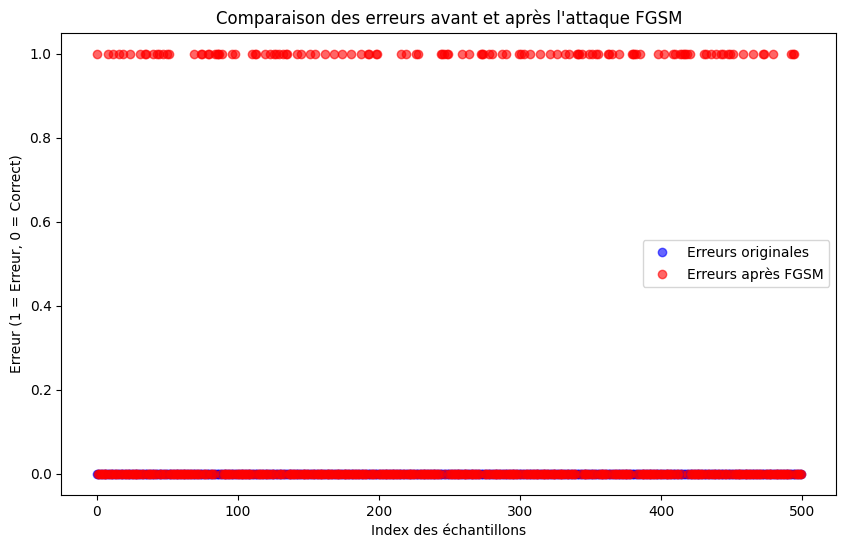

In [ ]:
# Prédictions originales sur le sous-échantillon
y_pred_original = model.predict(X_test_sample)

# Prédictions après l'attaque FGSM
y_pred_adv = model.predict(X_test_adv)

# Calculer les erreurs avant et après l'attaque
errors_original = np.where(y_test_sample != y_pred_original, 1, 0)  # 1 si erreur
errors_adv = np.where(y_test_sample != y_pred_adv, 1, 0)  # 1 si erreur

# Visualisation des erreurs
plt.figure(figsize=(10, 6))
indices = range(len(y_test_sample))

plt.plot(indices, errors_original, 'bo', label="Erreurs originales", alpha=0.6)
plt.plot(indices, errors_adv, 'ro', label="Erreurs après FGSM", alpha=0.6)

plt.title("Comparaison des erreurs avant et après l'attaque FGSM")
plt.xlabel("Index des échantillons")
plt.ylabel("Erreur (1 = Erreur, 0 = Correct)")
plt.legend()
plt.show()

On réentraine le modèle afin qu'il puisse se défendre fase à cette attaque.

In [ ]:
# Ajouter les exemples adversariaux existants aux données d'entraînement
X_train_defense = pd.concat([X_train, X_test_adv])  # Ajouter les données adversariales
y_train_defense = pd.concat([y_train, y_test_sample])  # Ajouter les étiquettes correspondantes

print(f"Nouvelle taille des données d'entraînement : {X_train_defense.shape}")
# Réentraîner le modèle avec les nouvelles données combinées
print("Début du réentraînement (fine-tuning) avec les données adversariales...")

model.fit(X_train_defense, y_train_defense, xgb_model=model.get_booster())

print("Fine-tuning terminé. Le modèle a été renforcé contre l'attaque FGSM.")



Nouvelle taille des données d'entraînement : (80888, 45)
Début du réentraînement (fine-tuning) avec les données adversariales...
Fine-tuning terminé. Le modèle a été renforcé contre l'attaque FGSM.


In [ ]:
# Générer de nouvelles données adversariales après la défense
epsilon = 1000  # Même epsilon que lors de l'attaque initiale
X_test_adv_new = fgsm_attack(model, X_test_sample, y_test_sample, epsilon)

# Prédictions après la défense
y_pred_adv_defense = model.predict(X_test_adv_new)
accuracy_defense = accuracy_score(y_test_sample, y_pred_adv_defense)

print(f"Précision après défense contre FGSM (epsilon={epsilon}) : {accuracy_defense:.4f}")


Précision après défense contre FGSM (epsilon=1000) : 1.0000


Attaque par bruit aléatoire maintenant

In [ ]:
# Fonction pour ajouter un bruit aléatoire aux données
def random_noise_attack(X, noise_level=0.1):
    X_noisy = X.copy()
    noise = np.random.normal(0, noise_level, X.shape)  # Générer un bruit gaussien
    X_noisy += noise  # Ajouter le bruit aux données originales
    return X_noisy

In [ ]:
# Sélectionner un sous-échantillon des données de test
X_test_sample = X_test.sample(n=500, random_state=42)  # 500 échantillons
y_test_sample = y_test.loc[X_test_sample.index]

# Appliquer le bruit aléatoire
noise_level = 0.5  # Intensité du bruit
X_test_noisy = random_noise_attack(X_test_sample, noise_level)

# Vérifier les premières lignes des données bruitées
print("Aperçu des données bruitées :")
print(X_test_noisy.head())

Aperçu des données bruitées :
        Header_Length  Protocol Type   Duration          Rate         Srate  \
31591    57996.503063       5.770032  63.393586      0.826218      1.075624   
1199    147359.027187       5.907826  64.576825      1.149770      1.424629   
111871      55.105759       6.209643  64.072850      2.864616      2.731678   
79255    14799.244626      16.959744  64.419132  19489.967841  19488.673254   
71692   303031.559537       6.816503  63.988615      2.591588      1.444308   

           Drate  fin_flag_number  syn_flag_number  rst_flag_number  \
31591   0.372743        -0.309967        -0.962464         0.390190   
1199   -0.577479        -0.083768        -0.008135         0.130997   
111871  1.340772         0.185926         1.128961        -0.801467   
79255   0.549728        -0.690742        -0.389745         0.497621   
71692   0.938402        -0.199509        -0.315905         0.689622   

        psh_flag_number  ...         AVG        Std    Tot size     

In [ ]:
# Prédictions sur les données originales
y_pred_original = model.predict(X_test_sample)
accuracy_original = accuracy_score(y_test_sample, y_pred_original)

# Prédictions sur les données bruitées
y_pred_noisy = model.predict(X_test_noisy)
accuracy_noisy = accuracy_score(y_test_sample, y_pred_noisy)

# Afficher les résultats
print(f"Précision sur les données originales : {accuracy_original:.4f}")
print(f"Précision après l'attaque par bruit aléatoire : {accuracy_noisy:.4f}")


Précision sur les données originales : 1.0000
Précision après l'attaque par bruit aléatoire : 0.9640


In [ ]:
# Appliquer un bruit plus intense
noise_level = 100.0  # Augmentation du niveau de bruit
X_test_noisy = random_noise_attack(X_test_sample, noise_level)

# Prédictions sur les données bruitées
y_pred_noisy = model.predict(X_test_noisy)
accuracy_noisy = accuracy_score(y_test_sample, y_pred_noisy)

print(f"Précision après attaque renforcée (bruit plus intense) : {accuracy_noisy:.4f}")


Précision après attaque renforcée (bruit plus intense) : 0.8200


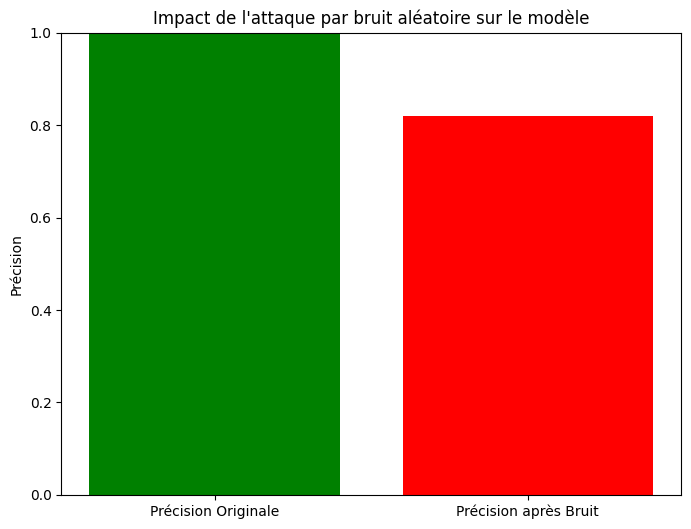

In [ ]:
# Graphique de comparaison des précisions
plt.figure(figsize=(8, 6))
plt.bar(['Précision Originale', 'Précision après Bruit'],
        [accuracy_original, accuracy_noisy], color=['green', 'red'])

plt.title("Impact de l'attaque par bruit aléatoire sur le modèle")
plt.ylabel("Précision")
plt.ylim(0, 1)
plt.show()

In [ ]:
# Générer des données bruitées pour l'entraînement
noise_level = 100  # Force du bruit
X_train_noisy = random_noise_attack(X_train, noise_level)

# Combiner les données originales et bruitées
X_train_defense = pd.concat([X_train, X_train_noisy])
y_train_defense = pd.concat([y_train, y_train])

print(f"Nouvelle taille des données d'entraînement : {X_train_defense.shape}")


Nouvelle taille des données d'entraînement : (160776, 45)


In [ ]:
# Réentraînement du modèle avec les données augmentées
print("Réentraînement du modèle avec des données bruitées pour contrer l'attaque...")

model.fit(X_train_defense, y_train_defense, xgb_model=model.get_booster())

print("Fine-tuning terminé. Le modèle a été renforcé contre le bruit aléatoire.")


Réentraînement du modèle avec des données bruitées pour contrer l'attaque...
Fine-tuning terminé. Le modèle a été renforcé contre le bruit aléatoire.


In [ ]:
# Générer du bruit aléatoire sur les données de test
X_test_noisy = random_noise_attack(X_test, noise_level)

# Prédictions après la défense
y_pred_noisy_defense = model.predict(X_test_noisy)
accuracy_noisy_defense = accuracy_score(y_test, y_pred_noisy_defense)

print(f"Précision après défense contre le bruit aléatoire : {accuracy_noisy_defense:.4f}")


Précision après défense contre le bruit aléatoire : 0.9966
